# Lab 1 Simple image operations

In [34]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

## Open the image in RGB, and apply color transformation into an arbitrary color scheme.

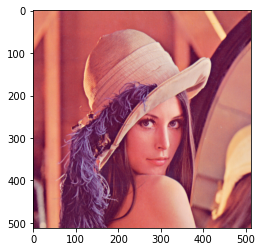

In [31]:
img = cv2.imread('img/lenna.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

## Factorize the color layers into three different grayscale images.

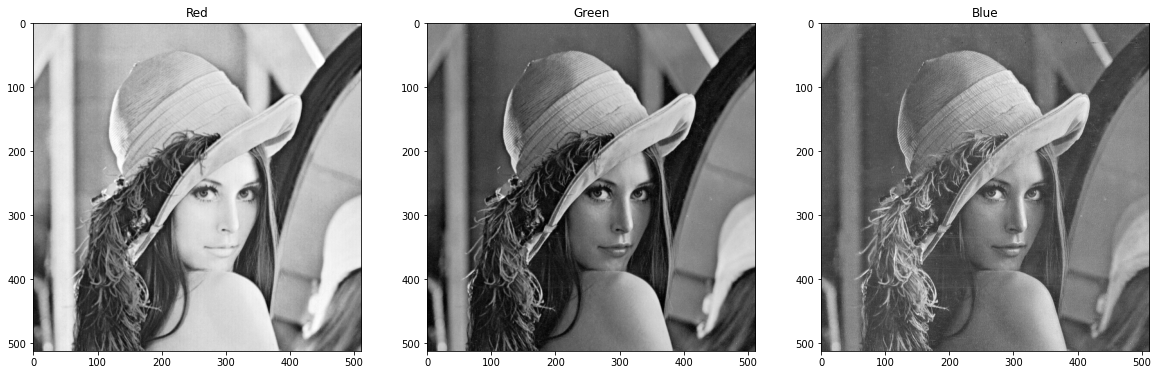

In [36]:
channels = cv2.split(img)
names = ("Red", "Green", "Blue")
plt.figure(figsize=(20,10))
for i, channel in enumerate(channels):
    plt.subplot(1, 3, i+1).set_title(names[i])
    plt.imshow(channel, cmap='gray')


## Apply gamma-correction using lookup-tables.

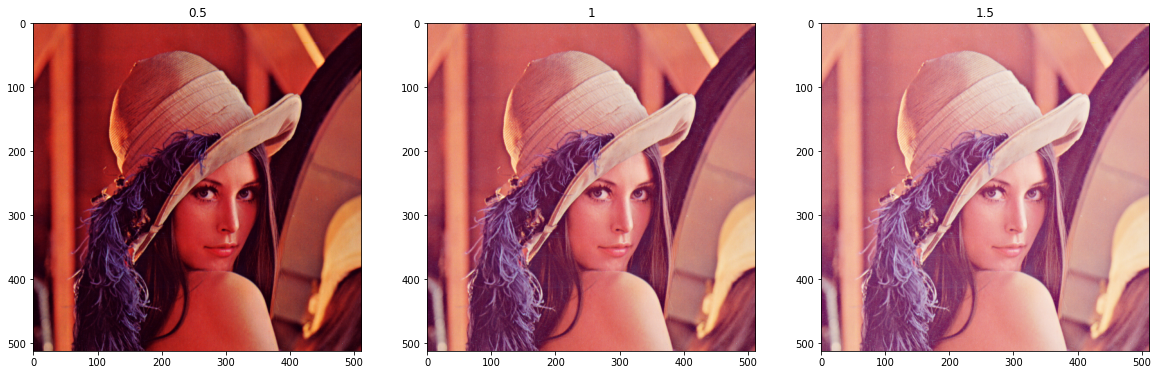

In [39]:
def adjust_gamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)

gammas = (0.5, 1, 1.5)

plt.figure(figsize=(20,10))

for i, gamma in enumerate(gammas):
    plt.subplot(1, len(gammas), i+1).set_title(gammas[i])
    plt.imshow(adjust_gamma(img, gamma))

## Calculate and show the intensity histogram.

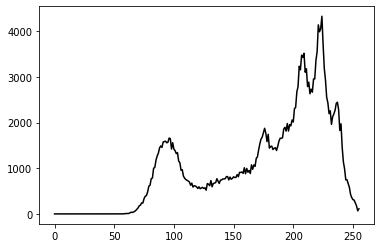

In [49]:
grayscale = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist, color="black")


## Perform histogram equalization.

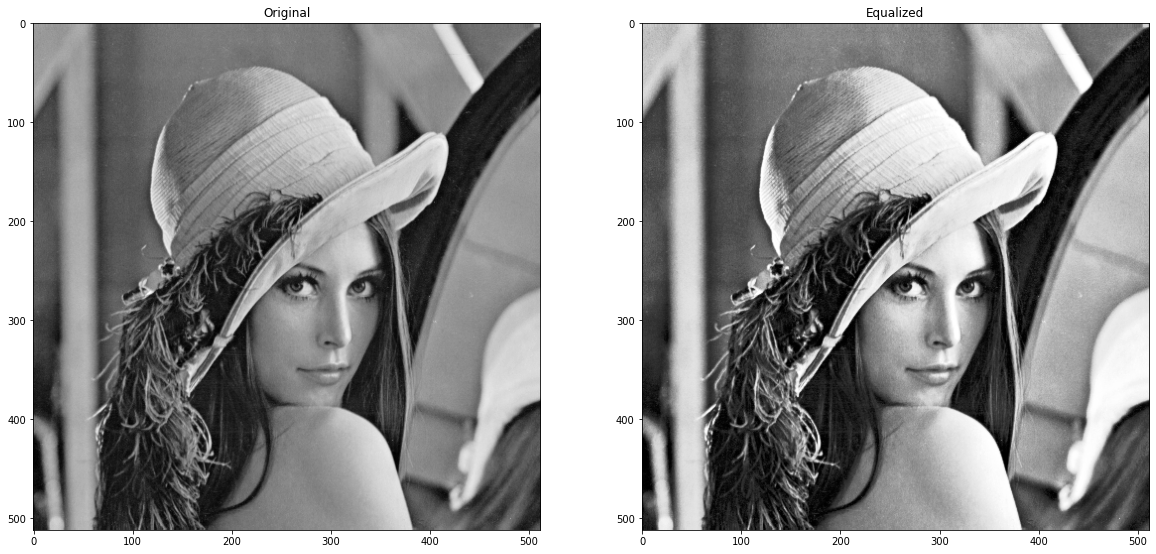

In [55]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1).set_title("Original")
plt.imshow(grayscale, cmap="gray")
plt.subplot(1, 2, 2).set_title("Equalized")
plt.imshow(cv2.equalizeHist(grayscale), cmap="gray")